<img src="logo.png" alt="Drawing" style="width: 80px;"/>

## Exercise 3 - Machine Learning in Python (Classification Example) - By Omer Dembinsky
#### Based on HR Analytics Employee Attrition:
https://www.kaggle.com/giripujar/hr-analytics

In [2]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

## **Basic data exploration**

#### Download and read the data

In [4]:
df = pd.read_csv("HR_comma_sep.csv") 

#### Examine your data using different methods

Use the head, info function to get a sense of your data.

In [6]:
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
5169,0.51,0.58,4,140,3,0,0,0,technical,high
3989,0.83,0.81,3,242,6,0,0,0,sales,low
5210,0.50,0.91,3,240,2,0,0,0,sales,medium
6509,1.00,0.95,3,275,3,1,0,0,sales,medium
14692,0.10,0.79,6,274,4,0,1,0,sales,low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


***There are 10 features: 8 numeric and 2 objects.***

*Some of the numeric features seem to be categorical (left, promotion, work accident)

In [9]:
df.describe()
#The describe function is applied to numeric features only: 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


**For categrical variables use value_counts method:**

In [11]:
df["Department"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [12]:
df["promotion_last_5years"].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

#### Identify missing data
To identify missing values you can look on the describe function results, or to use the direct functions isna and isnull, with sum.

In [14]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

## **Handle categorical feature**


#### Categorical variables need to be transformed to an integer, as sklearn works with numeric data only. 
#### Some are already encoded as numbers, but two are still objects.

##### Map Ordinal features
We can define a dictionary that maps each ordinal value to a numerical value, and then use the function "map" as shown below, or use the function "replace" as shown in: http://pbpython.com/categorical-encoding.html .

In [18]:
df_prep = df.copy() # we are starting to make changes to the original data, so we'll do it on a copy of the data

In [19]:
salary_map = {'low':0, 'medium':1, 'high':2}  #Define the mapping as a dictionary
df_prep["salary"] =  df_prep["salary"].map(salary_map)
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


##### Handle Nominal features
We now wish to encode the "Department" column. The "Department" column has the following 10 values:
* 'sales':0, 'accounting':1, 'hr':2, 'technical':3, 'support':4, 'management':5, 'IT':6, 'product_mng':7, 'marketing':8, 'RandD':9


To encode the feature we can define a map per each value. However, manual one by one change is not recommended, as the categorical column may have large or changing number of values. Below we will show "get_dummies" method and there is also onehotencoder code commented out. 

See more solutions in: http://pbpython.com/categorical-encoding.html

In [21]:
#OnehotEncoder - requires running the encoding and then connecting the result to the original dataframe

#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder()
#enc_df = pd.DataFrame(enc.fit_transform(df_prep[['Department']]).toarray())
#df_new = df.join(enc_df)
#df_new_new = df_new.drop(columns=['Department'])

In [22]:
#get_dummies
df_prep = pd.get_dummies(df_prep, columns=["Department"], prefix=["dep"]) 
#You can't run this command twice as df changes. Select from Kernal menu the Restart and Run All option.
#Another option is to define a new dataframe (df_dummies/df_new/) from this point so you still have the original df to work with
df_prep.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [23]:
df_prep.info()
#note the original depertment column no longer exists

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  int64  
 9   dep_IT                 14999 non-null  uint8  
 10  dep_RandD              14999 non-null  uint8  
 11  dep_accounting         14999 non-null  uint8  
 12  dep_hr                 14999 non-null  uint8  
 13  dep_management         14999 non-null  uint8  
 14  dep_marketing          14999 non-null  uint8  
 15  de

***Now, all the features are numeric.***

## **Split the data to train and test**

The more in-depth EDA and data preparations are done only on train data. Test data is set aside, so testing will be objective. Typically 20%-30% of the rows go randomly to test data. 

**We also need to verify we know what Y we are looking for - in our case the "left" value.**

In [26]:
#Before the split
df_prep.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.594706,0.081805,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183,0.274077,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
train_df, test_df= train_test_split (df_prep, test_size = 0.2, random_state=7) 
# note there is no output on the command!
# train_test_split is from sklearn. It requiers that all data is numerical (as we made sure in section b)
# If the prediction class in y is very small percent, then add a parameter startify = y ; this makes sure there are enough samples of the "positive" value

In [28]:
# After the split
train_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,0.611717,0.716795,3.810651,201.333528,3.505542,0.140845,0.240687,0.021835,0.593549,0.081257,0.052921,0.052588,0.047087,0.043087,0.058505,0.058755,0.274190,0.149012,0.182599
std,0.249096,0.171054,1.237230,50.078128,1.463889,0.347876,0.427518,0.146151,0.639372,0.273240,0.223885,0.223218,0.211834,0.203061,0.234705,0.235175,0.446124,0.356116,0.386353
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,201.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Classification
## Define Target Value
#### - For Classification our target value will be the "left" value, in order to predict attrition.

#### Try to find potential features impacting the target value (done on Train data only!)
This is only an example - much more can be done using various visuals (scatter plots, box plots) and analysis.

In [31]:
train_df.groupby(['left']).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
left,,,,,,,,,,,,,,,,,,
0,0.666359,0.715567,3.787729,199.112721,3.385029,0.170344,0.02700,0.650313,0.081989,0.059159,0.050159,0.043793,0.048293,0.059379,0.060476,0.273186,0.145977,0.177588
1,0.439332,0.720668,3.882964,208.339681,3.885734,0.047784,0.00554,0.414474,0.078947,0.033241,0.060249,0.057479,0.026662,0.055748,0.053324,0.277355,0.158587,0.198407


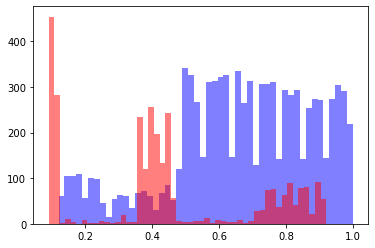

In [32]:
# deeper look at the distribution comparison within one of the "stronger" features
plt.hist(train_df[train_df["left"] ==0]["satisfaction_level"], bins=50, color='blue', alpha = 0.5)
plt.hist(train_df[train_df["left"] ==1]["satisfaction_level"], bins=50, color='red', alpha = 0.5)
plt.show()

## **Classification Trees**

### The building of the tree is done based on the Train data only!
### We need to split the train_df to X (all features) and y (target) 

In [35]:
X = train_df.drop("left", axis=1)

In [36]:
y = train_df["left"]

In [37]:
y.head()

14842    1
13070    0
10444    0
7885     0
7796     0
Name: left, dtype: int64

In [38]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,dep_IT,dep_RandD,dep_accounting,dep_hr,dep_management,dep_marketing,dep_product_mng,dep_sales,dep_support,dep_technical
14842,0.34,0.67,4,141,2,0,0,0,0,0,0,0,0,0,0,1,0,0
13070,0.73,0.69,3,228,2,0,1,1,0,0,0,0,0,0,0,1,0,0
10444,0.63,0.89,3,239,3,0,0,1,1,0,0,0,0,0,0,0,0,0
7885,0.72,0.60,3,265,2,1,0,2,0,0,0,0,0,0,0,1,0,0
7796,0.57,0.85,4,152,3,0,0,1,0,0,0,0,0,0,0,1,0,0


### Now we can call the model we want to use and build a few optional trees. We can change the data input and the model hyperparametes.

In [40]:
# from sklearn.tree import DecisionTreeClassifier

### Tree 1 - using 3 fields that seem to show medium impact, and low depth tree

In [42]:
X1 = X[["number_project","time_spend_company","dep_technical"]]

In [43]:
tree1 = DecisionTreeClassifier(max_depth=2)

In [44]:
tree1.fit(X1,y)

DecisionTreeClassifier(max_depth=2)

### Tree 2 - using 3 fields that show potential higher impact, and deeper tree

In [46]:
X2 = X[["satisfaction_level","salary","average_montly_hours"]]

In [47]:
tree2 = DecisionTreeClassifier(max_depth=5)

In [48]:
tree2.fit(X2,y)

DecisionTreeClassifier(max_depth=5)

## **Evaluate the Results**

### Run models on Test data

In [51]:
#Create X and y for test
X_test = test_df.drop("left", axis=1)
y_test = test_df["left"]

In [52]:
#Run predictions using the 3 trees.
# For each we need to have the same X structure as in the train stage
y_test_predict1 = tree1.predict(X_test[["number_project","time_spend_company","dep_technical"]])
y_test_predict2 = tree2.predict(X_test[["satisfaction_level","salary","average_montly_hours"]])

### Confusion Matrix

In [54]:
#from sklearn.metrics import confusion_matrix

In [55]:
print("Confusion Matrix Tree 1 prediction: \n", confusion_matrix(y_test, y_test_predict1),"\n")
print("Confusion Matrix Tree 2 prediction:\n", confusion_matrix(y_test, y_test_predict2),"\n")  

Confusion Matrix Tree 1 prediction: 
 [[2199  118]
 [ 375  308]] 

Confusion Matrix Tree 2 prediction:
 [[2293   24]
 [ 218  465]] 



In [56]:
# We also want to calculate the measurements on the train data to check overfitting: 

y_train_predict1 = tree1.predict(X1)
y_train_predict2 = tree2.predict(X2)

print("Confusion Matrix Tree 1 on Train:\n", confusion_matrix(y, y_train_predict1),"\n")
print("Confusion Matrix Tree 2 on Train:\n", confusion_matrix(y, y_train_predict2),"\n") 

Confusion Matrix Tree 1 on Train:
 [[8686  425]
 [1661 1227]] 

Confusion Matrix Tree 2 on Train:
 [[9015   96]
 [ 924 1964]] 



### Precision and Recall

In [58]:
# from sklearn.metrics import precision_score, recall_score

In [59]:
print("The precision for Tree 1 is ",precision_score(y_test, y_test_predict1)) 
print("The recall for Tree 1 is ",recall_score(y_test, y_test_predict1),"\n")
print("The precision for Tree 2 is ",precision_score(y_test, y_test_predict2)) 
print("The recall for Tree 2 is ",recall_score(y_test, y_test_predict2),"\n")  

The precision for Tree 1 is  0.7230046948356808
The recall for Tree 1 is  0.45095168374816985 

The precision for Tree 2 is  0.950920245398773
The recall for Tree 2 is  0.6808199121522694 



In [60]:
print("The precision for Tree 1 on TRAIN is ",precision_score(y, y_train_predict1)) 
print("The recall for Tree 1 on TRAIN is ",recall_score(y, y_train_predict1),"\n")  
print("The precision for Tree 2 on TRAIN is ",precision_score(y, y_train_predict2)) 
print("The recall for Tree 2 on TRAIN is ",recall_score(y, y_train_predict2),"\n")  

The precision for Tree 1 on TRAIN is  0.7427360774818402
The recall for Tree 1 on TRAIN is  0.42486149584487537 

The precision for Tree 2 on TRAIN is  0.9533980582524272
The recall for Tree 2 on TRAIN is  0.6800554016620498 



#### - Both trees behave quite similarly in train and test, meaning they are robust and reliable (no overfitting).
#### - Tree 2 has much better results, but are they good enough? The question whether it is good enough overall is based on our business needs (are we ok with false detections? Are we ok with misses?) 
#### - We can of course keep improving by providing better data (more features, collect more samples), tuning the hyperparameters or by using more advanced models.

## **Predict using chosen tree**

In [63]:
# predict using Tree2
print("values in test are:\n", test_df[["satisfaction_level","salary","average_montly_hours","left"]][17:23],"\n")
print("prediction is", tree2.predict(test_df[["satisfaction_level","salary","average_montly_hours"]][17:23]),"\n")
print("prediction PROBABILITY is:", tree2.predict_proba(test_df[["satisfaction_level","salary","average_montly_hours"]][17:23]))


values in test are:
        satisfaction_level  salary  average_montly_hours  left
5448                 0.99       0                   195     0
1458                 0.40       0                   136     1
4154                 0.98       1                   150     0
11239                0.82       2                   214     0
12545                0.78       1                   236     1
4970                 0.74       1                   257     0 

prediction is [0 1 0 0 0 0] 

prediction PROBABILITY is: [[1.         0.        ]
 [0.073115   0.926885  ]
 [1.         0.        ]
 [0.99122807 0.00877193]
 [0.7110885  0.2889115 ]
 [0.7110885  0.2889115 ]]


# Ensemble Learning: Random Forest and Gradient Boosting

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Define two forests
rf1 = RandomForestClassifier(n_estimators = 1000, max_depth = 2, n_jobs= -1)
rf2 = RandomForestClassifier(n_estimators = 200, max_depth = 3, n_jobs= -1, class_weight='balanced')

# Train both on same data
rf1.fit (X, y)
rf2.fit (X, y)

# Run predictions on test and on train
y_pred_rf1 = rf1.predict(X_test)
y_pred_rf2 = rf2.predict(X_test)
y_pred_train_rf1 = rf1.predict(X)
y_pred_train_rf2 = rf2.predict(X)

In [66]:
print("Confusion Matrix Forest 1: \n", confusion_matrix(y_test, y_pred_rf1),"\n")
print("Confusion Matrix Forest 2:\n", confusion_matrix(y_test, y_pred_rf2),"\n")

Confusion Matrix Forest 1: 
 [[2307   10]
 [ 316  367]] 

Confusion Matrix Forest 2:
 [[2138  179]
 [  60  623]] 



In [67]:
print("The precision for Forest 1 is ",precision_score(y_test, y_pred_rf1)) 
print("The recall for Forest 1 is ",recall_score(y_test, y_pred_rf1),"\n")  
print("The precision on Train for Forest 1 is ",precision_score(y, y_pred_train_rf1)) 
print("The recall on Train for Forest 1 is ",recall_score(y, y_pred_train_rf1),"\n")  
print("The precision for Forest 2 is ",precision_score(y_test, y_pred_rf2)) 
print("The recall for Forest 2 is ",recall_score(y_test, y_pred_rf2),"\n")
print("The precision on Train for Forest 2 is ",precision_score(y, y_pred_train_rf2)) 
print("The recall on Train for Forest 2 is ",recall_score(y, y_pred_train_rf2),"\n")  

The precision for Forest 1 is  0.9734748010610079
The recall for Forest 1 is  0.5373352855051244 

The precision on Train for Forest 1 is  0.9639240506329114
The recall on Train for Forest 1 is  0.5273545706371191 

The precision for Forest 2 is  0.7768079800498753
The recall for Forest 2 is  0.9121522693997072 

The precision on Train for Forest 2 is  0.7976827094474154
The recall on Train for Forest 2 is  0.9297091412742382 



### We can see that both models are stable (model did not overfit on train data). One is stronger in precision (correct when predicting employees leaving), and the other in recall (finds more employees who are leaving).

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=500, max_depth=3, max_features=6)

# Train on same data
gb.fit (X, y)

# Run predictions on test and on train
y_pred_gb = gb.predict(X_test)
y_pred_train_gb = gb.predict(X)
print("Confusion Matrix Gradient Boosting: \n", confusion_matrix(y_test, y_pred_gb),"\n")

Confusion Matrix Gradient Boosting: 
 [[2305   12]
 [  41  642]] 



In [70]:
print("The precision for GBM is ",precision_score(y_test, y_pred_gb)) 
print("The recall for GBM is ",recall_score(y_test, y_pred_gb),"\n") 

The precision for GBM is  0.981651376146789
The recall for GBM is  0.9399707174231332 



### After running Gradient Boosting we see it has much better results - so this will probably be our choice.

In [72]:
# predict using GBM
print("y_test is: \n",y_test[17:23])
print("prediction is", gb.predict(X_test[17:23]),"\n")
print("prediction PROBABILITY is:", gb.predict_proba(X_test[17:23]))

y_test is: 
 5448     0
1458     1
4154     0
11239    0
12545    1
4970     0
Name: left, dtype: int64
prediction is [0 1 0 0 1 0] 

prediction PROBABILITY is: [[9.99895866e-01 1.04134170e-04]
 [4.00457112e-03 9.95995429e-01]
 [9.99910854e-01 8.91464303e-05]
 [9.98402519e-01 1.59748075e-03]
 [1.05113518e-02 9.89488648e-01]
 [9.90316060e-01 9.68393959e-03]]


### we can see in the small sample that GBM was more accurate that the tree prediction, and also with higher certainty

## **Feature Importance**

In [75]:
rf2_feature_score = rf2.feature_importances_
gb_feature_score = gb.feature_importances_
feature_names = list(X)

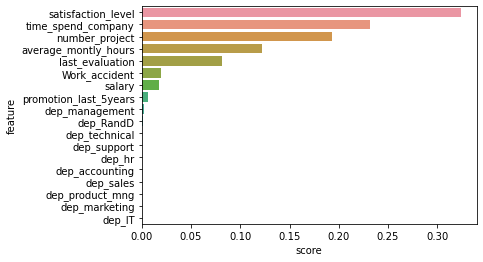

In [76]:
df_rf2_feature_score = pd.DataFrame(data=feature_names, columns=["feature"])
df_rf2_feature_score["score"]= rf2_feature_score
df_rf2_feature_score = df_rf2_feature_score.sort_values(by=['score'], ascending=False)
sns.barplot(y="feature", x="score", data=df_rf2_feature_score)
plt.show()

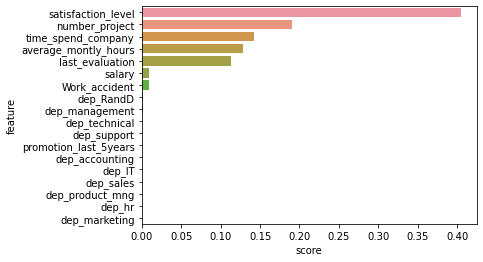

In [77]:
df_gb_feature_score = pd.DataFrame(data=feature_names, columns=["feature"])
df_gb_feature_score["score"]= gb_feature_score
df_gb_feature_score = df_gb_feature_score.sort_values(by=['score'], ascending=False)
sns.barplot(y="feature", x="score", data=df_gb_feature_score)
plt.show()

### In both models the top important features are similar (and also very similar to what we looked at manually), but in the Boosting the Satisfaction Level feature is stronger, and others also show some changes.
### We can also use this as a basis to understand our most significant features and then build a different (perhaps simpler) model focusing only on those.

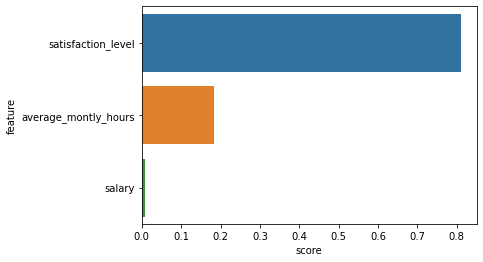

In [79]:
# We can also do the same on the tree - adapting the features used

tree2_feature_score=tree2.feature_importances_
tree2_feature_names = list(X2)

df_tree2_feature_score = pd.DataFrame(data=tree2_feature_names, columns=["feature"])
df_tree2_feature_score["score"]= tree2_feature_score
df_tree2_feature_score = df_tree2_feature_score.sort_values(by=['score'], ascending=False)
sns.barplot(y="feature", x="score", data=df_tree2_feature_score)
plt.show()